In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/road_accident.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
X = df.iloc[:,:-1]
y = df['FATALSUM']
trainX, testX, trainY, testY = train_test_split(X,y,test_size=.3,random_state=0)

In [6]:
trainX

,STATE,DAY_WEEK,LIGHT,WEATHER,ROAD_TYPE,VEHICLES,PERSONS,DRUNK_DRIVERS
1504,5,4,1,2,2,3,3,0
11156,31,7,2,10,2,1,1,1
2876,6,4,3,1,2,3,7,0
17954,48,3,1,1,8,3,1,0
6215,17,1,1,1,1,2,3,0
...,...,...,...,...,...,...,...,...
13123,37,1,3,10,2,2,2,1
19648,55,6,2,10,1,1,4,1
9845,26,2,1,1,1,2,6,1
10799,29,3,3,1,2,2,3,0


In [7]:
trainY

1504     1
11156    1
2876     1
17954    1
6215     6
        ..
13123    1
19648    1
9845     2
10799    1
2732     2
Name: FATALSUM, Length: 14058, dtype: int64

In [13]:
model_scores = []
for trees in range(50,205,5):
    model  = RandomForestRegressor(n_estimators=trees)
    model.fit(trainX , trainY)
    score = model.score(testX, testY) * 100
    model_scores.append(score)
    print(f'trees : {trees} ==> score : {score}')

trees : 50 ==> score : 67.38116253218588
trees : 55 ==> score : 67.94013617157788
trees : 60 ==> score : 68.5018380210368
trees : 65 ==> score : 68.21118690130807
trees : 70 ==> score : 68.75418401995393
trees : 75 ==> score : 68.57528905371987
trees : 80 ==> score : 68.57582171883044
trees : 85 ==> score : 67.72438658002318
trees : 90 ==> score : 68.18426217942088
trees : 95 ==> score : 67.34213037831915
trees : 100 ==> score : 67.65167118541032
trees : 105 ==> score : 68.70756443003849
trees : 110 ==> score : 68.14627304289151
trees : 115 ==> score : 68.57902783039425
trees : 120 ==> score : 68.92463059458976
trees : 125 ==> score : 68.38674514738105
trees : 130 ==> score : 68.80040367252722
trees : 135 ==> score : 69.09454353080653
trees : 140 ==> score : 68.0362992564982
trees : 145 ==> score : 68.80348762456127
trees : 150 ==> score : 67.95181930166746
trees : 155 ==> score : 68.6370572755675
trees : 160 ==> score : 68.3016752925644
trees : 165 ==> score : 68.44049397426116
trees 

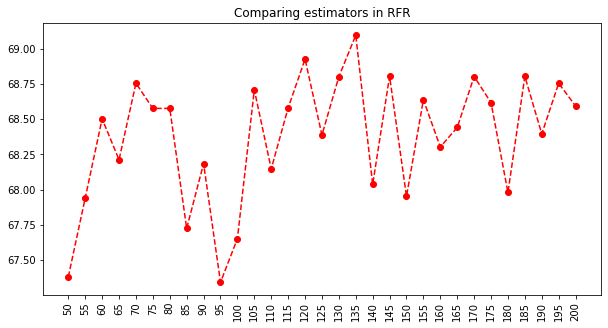

In [18]:
plt.figure(figsize=(10,5))
plt.plot(range(50,205,5),model_scores,'ro--',label="prediction scores")
plt.title("Comparing estimators in RFR")
plt.xticks(range(50,205,5),rotation=90)
plt.show()

In [19]:
model  = RandomForestRegressor(n_estimators=135)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=135, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
ypred = model.predict(testX)

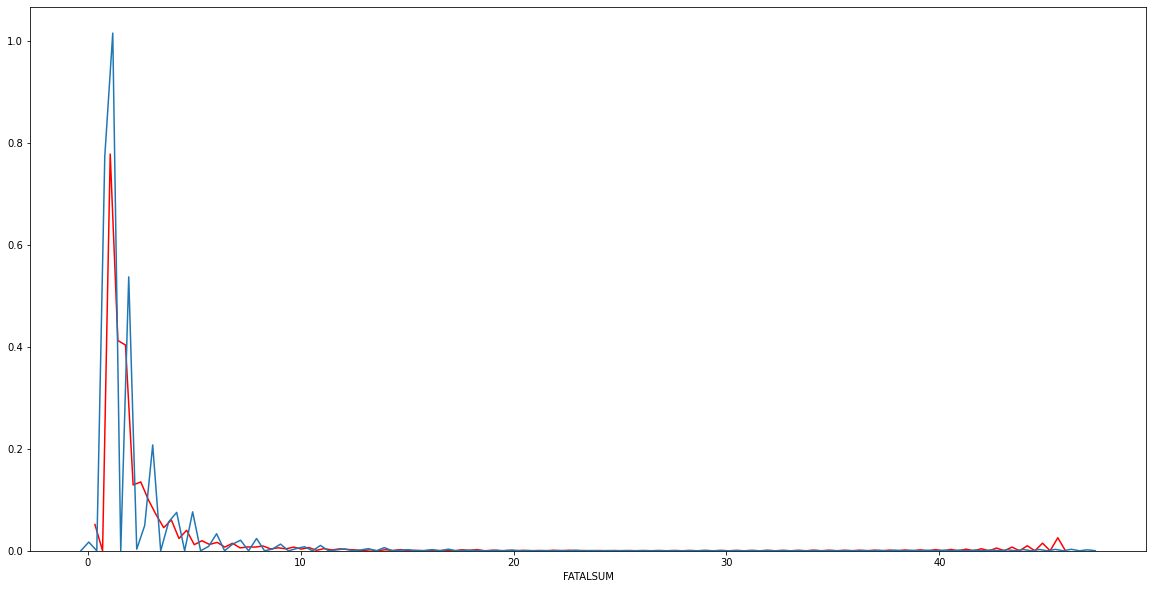

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
sns.distplot(ypred , hist=False,color='red',ax = ax)
sns.distplot(y , hist=False,ax = ax)
plt.show()

# testing on house pricing dataset

In [25]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/house_pricing.csv')

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
cityEnc = OneHotEncoder()
areatypeEnc = OneHotEncoder()

In [ ]:
dummycities = cityEnc.fit_transform(df[['City']]).toarray()
dcities = pd.DataFrame(dummycities,columns=sorted(df.City.unique()))
dcities

In [ ]:
dummyAreas = areatypeEnc.fit_transform(df[['Type']]).toarray()
dAreas = pd.DataFrame(dummyAreas,columns=sorted(df.Type.unique()))
dAreas

In [50]:
df.columns

Index(['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price'], dtype='object')

In [51]:
X = df[['Beds','Baths','SquareFeet']]

In [55]:
X = pd.concat([dcities.iloc[:,:-1],dAreas.iloc[:,:-1],X], axis =1)

In [56]:
y = df['Price']

In [57]:
trainX, testX, trainY, testY = train_test_split(X,y,test_size=.3,random_state=0)

trees : 50 ==> score : 92.82040967087246
trees : 55 ==> score : 92.66736834500693
trees : 60 ==> score : 93.09225037224418
trees : 65 ==> score : 92.83218674350606
trees : 70 ==> score : 92.74173688733985
trees : 75 ==> score : 92.67432756972941
trees : 80 ==> score : 92.96498182469998
trees : 85 ==> score : 93.18029490310316
trees : 90 ==> score : 92.63842894791202
trees : 95 ==> score : 93.0526653589474
trees : 100 ==> score : 93.0333272064042
trees : 105 ==> score : 92.94829632716119
trees : 110 ==> score : 93.19764463569192
trees : 115 ==> score : 92.97725249793116
trees : 120 ==> score : 93.16303711442959
trees : 125 ==> score : 93.088696596484
trees : 130 ==> score : 92.66486475712546
trees : 135 ==> score : 93.12128917771155
trees : 140 ==> score : 92.95677502828906
trees : 145 ==> score : 92.86793290462042
trees : 150 ==> score : 92.97050547664396
trees : 155 ==> score : 93.35696821088057
trees : 160 ==> score : 93.11188084813078
trees : 165 ==> score : 92.961194793663
trees : 

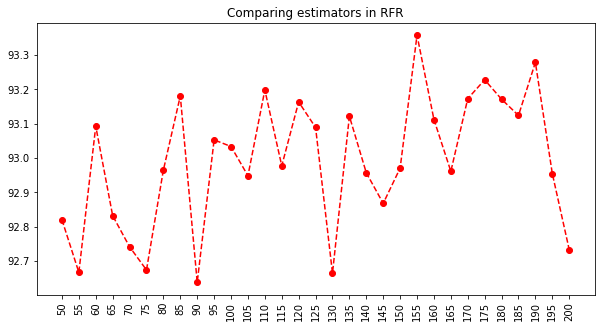

In [58]:
model_scores = []
for trees in range(50,205,5):
    model  = RandomForestRegressor(n_estimators=trees)
    model.fit(trainX , trainY)
    score = model.score(testX, testY) * 100
    model_scores.append(score)
    print(f'trees : {trees} ==> score : {score}')

plt.figure(figsize=(10,5))
plt.plot(range(50,205,5),model_scores,'ro--',label="prediction scores")
plt.title("Comparing estimators in RFR")
plt.xticks(range(50,205,5),rotation=90)
plt.show()